In [1]:
# This code splits the given dataset to test-train files.


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
sns.set_theme()
sns.set_style('white')
#sns.set_context("paper", font_scale = 2)
print('Pandas v', pd.__version__)

Pandas v 1.3.5


In [2]:
# Notes about result files:
# 'results_230214_205321.pkl' # classical ML - Dataset: Train Kaggle, Test Kaggle
# 'results_230214_210527.pkl' # classical ML - Dataset: Train Harika, Test Harika
# 'results_230214_211201.pkl' # classical ML- Dataset: Train: Harika.train, Test: Kaggle.test

# 'results_230214_205100.pkl' # bert - Dataset: Train Kaggle, Test Kaggle
# '??.pkl' # bert- Dataset: Train Harika, Test Harika
# 'results_230214_193603.pkl' # bert- Dataset: Train: Harika.train, Test: Kaggle.test
main_folder = Path('../')


results_file = main_folder / 'results_230214_205321.pkl' # classical ML
results_file_bert = main_folder / 'results_230214_205100.pkl' # bert
print(results_file.is_file())
print(results_file_bert.is_file())

True
True


In [3]:

df = pd.read_pickle(results_file_bert)
#df

In [175]:
df = pd.read_pickle(results_file)
#df

In [21]:
#%%script echo skip
df = pd.read_pickle(results_file)
df2 = pd.read_pickle(results_file_bert)
df2.loc[:,"overall_accuracy"] = df2.loc[:,"overall_accuracy"]*100.0
df_all = pd.concat([df, df2])
#df_all
#df_all.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small","f1"]+1
#df_acc = (df_all.tn + df_all.tp).div(df_all.tn + df_all.tp + df_all.fn + df_all.fp)*100 #fill the missing accuracies that I forgot to record

#df_all.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small","overall_accuracy"] = df_acc.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small"]
#df_acc.loc["small_bert/bert_en_uncased_L-4_H-512_A-8":"electra_small"]

#df = df_all
#df

In [22]:
df = df_all.copy()

In [23]:
# Fix Nan value of hybrid1_all_ml_averaged

#df.loc["hybrid1_all_ml_averaged"]["training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
#df.loc["hybrid1_all_ml_averaged"]["testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
df.at["hybrid1_all_ml_averaged", "training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
df.at["hybrid1_all_ml_averaged", "testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
#df

In [24]:
# Normalize time (per sample/ms )
df.loc[:,"training time"] = df.loc[:,"training time"]*1000 / df.loc[:,"train size"]
df.loc[:,"testing time"] = df.loc[:,"testing time"]*1000 / df.loc[:,"test size"]

In [277]:
#df['log(f1/s)'] = np.log10(df.loc[:,"f1"] / df.loc[:,"testing time"])

In [25]:
df

,overall_accuracy,precision,recall,f1,tn,fp,fn,tp,train size,test size,train data,test data,training time,testing time
bow_nb,98.513558,0.978317,0.982151,0.980230,3775,50,41,2256,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.000774,0.000326
bow_xgboost,98.448220,0.996841,0.961689,0.978950,3818,7,88,2209,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.144264,0.004694
bow_svm,98.546227,0.995067,0.966043,0.980340,3814,11,78,2219,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,2.012650,0.297275
boc_nb,92.045083,0.834442,0.983021,0.902658,3377,448,39,2258,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.000815,0.000815
boc_xgboost,99.673309,0.999123,0.992164,0.995631,3823,2,18,2279,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.360882,0.005050
boc_svm,99.640640,0.997376,0.993034,0.995201,3819,6,16,2281,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.421575,0.276956
tfidf_nb,97.141457,0.969469,0.953853,0.961598,3756,69,106,2191,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.000285,0.000163
tfidf_xgboost,99.232277,0.999113,0.980409,0.989673,3823,2,45,2252,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.130031,0.002792
tfidf_svm,98.546227,0.988928,0.972138,0.980461,3800,25,64,2233,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,1.403676,0.252273
tfidfng_nb,92.273767,0.837029,0.986069,0.905457,3384,441,32,2265,24487,6122,SQLiV3_train.tsv,SQLiV3_test.tsv,0.000774,0.000494


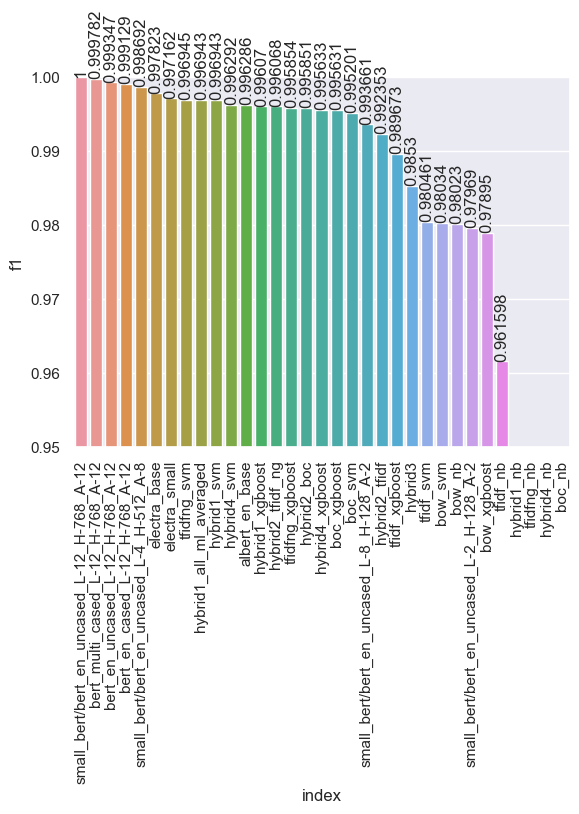

In [202]:
metric = 'f1'
df_sorted = df.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric)
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

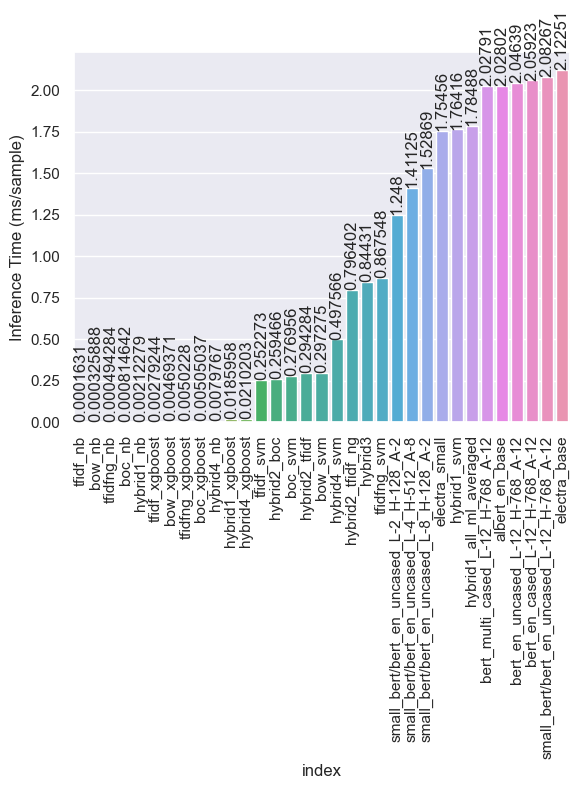

In [230]:
metric = 'testing time'
df_sorted = df.sort_values(metric,ascending=True).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Inference Time (ms/sample)')
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

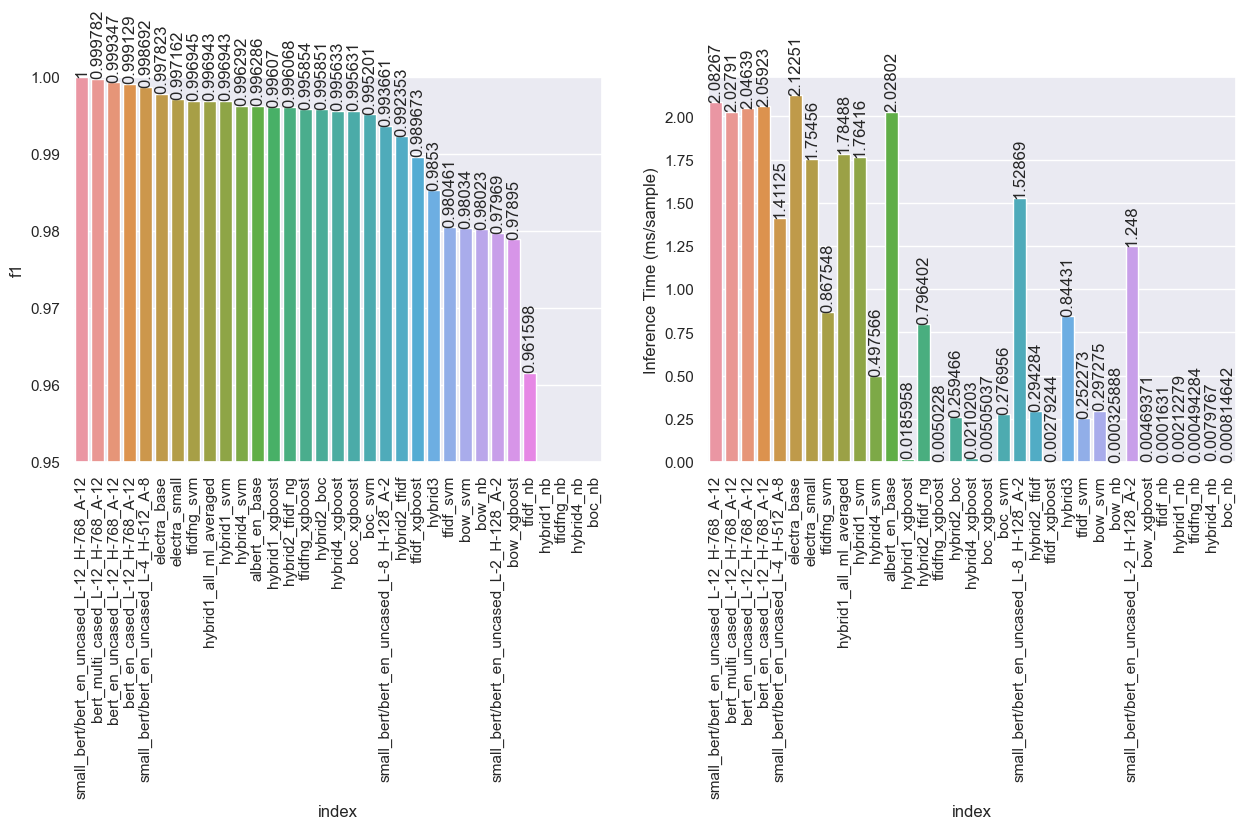

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

metric = 'f1'
df_sorted = df.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric, ax=axes[0])
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

metric = 'testing time'
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric, ax=axes[1])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Inference Time (ms/sample)')
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

In [ ]:
# experimental
df_sorted = df.sort_values("f1",ascending=False).reset_index()
df_res_index = df_sorted.reset_index()
df_melted = pd.melt(df_res_index, id_vars="index", var_name="metric", value_name="value")
#df_melted

# Latex

In [9]:
# Rename Columns and Index properly (for latex tables and figures)
def rename_table_labels(df_bad_labeled):
    column_mapper = {
        "overall_accuracy": "Accuracy", 
        "precision": "Precision",
        "recall":"Recall",
        "f1":"F1",
        "tn":"TN",
        "tp":"TP",
        "fn":"FN",
        "fp":"FP",
        "train size":"Train Size",
        "test size":"Test Size",
        "train data":"Train Data",
        "test data":"Test Data",
        "training time":"Training Time (ms)",
        "testing time":"Inference Time (ms)",
        "log(f1/s)":"F1 Efficiency"
        }
    index_mapper = {
        "bow_nb": "BoW NB",
        "bow_xgboost": "BoW XGBoost", #TODO rename all
        'bow_svm':'BoW SVM',
        'boc_nb': 'BoC NB', 
        'boc_xgboost':'BoC XGBoost', 
        'boc_svm': 'BoC SVM',
        'tfidf_nb': 'TF-IDF NB', 
        'tfidf_xgboost': 'TF-IDF XGBoost', 
        'tfidf_svm': 'TF-IDF SVM', 
        'tfidfng_nb': 'TF-IDF ngram NB',
        'tfidfng_xgboost': 'TF-IDF ngram XGBoost', 
        'tfidfng_svm': 'TF-IDF ngram SVM', 
        'hybrid1_nb': 'Hybrid-1 NB', 
        'hybrid1_xgboost': 'Hybrid-1 XGBoost',
        'hybrid1_svm': 'Hybrid-1 SVM', 
        'hybrid1_all_ml_averaged': 'Hybrid-1 All', 
        'hybrid2_boc': 'Hybrid-2 BoC',
        'hybrid2_tfidf': 'Hybrid-2 TF-IDF', 
        'hybrid2_tfidf_ng': 'Hybrid-2 TF-IDF ngram', 
        'hybrid3': 'Hybrid-3', 
        'hybrid4_nb': 'Hybrid-4 NB',
        'hybrid4_xgboost': 'Hybrid-4 XGBoost', 
        'hybrid4_svm': 'Hybrid-4 SVM', 
        'bert_en_uncased_L-12_H-768_A-12' : 'BERT UL12H768A12',
        'bert_en_cased_L-12_H-768_A-12' : 'BERT CL12H768A12',
        'small_bert/bert_en_uncased_L-2_H-128_A-2' : 'BERT small UL2H128A2',
        'small_bert/bert_en_uncased_L-4_H-512_A-8' : 'BERT small UL4H512A8',
        'small_bert/bert_en_uncased_L-8_H-128_A-2' : 'BERT small UL8H128A2',
        'small_bert/bert_en_uncased_L-12_H-768_A-12' : 'BERT small UL12H768A12',
        'bert_multi_cased_L-12_H-768_A-12' : 'BERT MCL12H768A12', 
        'albert_en_base' : 'ALBERT', 
        'electra_base' : 'ELECTRA',
        'electra_small': 'ELECTRA small'
    }
    
    df_new_labeled = df_bad_labeled.rename(columns=column_mapper, index=index_mapper)
    df_new_labeled.index.rename("Method",inplace=True)
    return df_new_labeled

## Latex Figures

In [300]:
import scienceplots
plt.style.use(['science','no-latex','ieee'])

## Latex tables

In [10]:
import pathlib
latex_dir = Path(r"C:\Users\3057550\OneDrive - Queen's University Belfast\ECIT\Research\AI_Cybersecurity\Teams Files\Papers\In preparation\NLP for SQLi detection\latex\hybrid_nlp_journal")
table_folder= latex_dir / "Tables"
figure_folder= latex_dir / "Figures"
assert (table_folder.is_dir()), "No such folder"
assert (figure_folder.is_dir()), "No such folder"



In [259]:
def process_style_to_my_latex_format(df_latex):
    # returns style object
    s = df_latex.reset_index().style.hide_index()
    s = s.format(precision=4, escape="latex")
    return s

In [281]:
%%script echo skipping cell
# template
table_name = "small"
caption="Generated by python"
out_file_name = (table_folder / table_name).with_suffix('.tex') 

df_small = df.loc["bow_nb":"bow_svm",["f1","tp"]]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small)
#df_small.style.columns[1:]
# s.to_latex(buf=out_file_name,
#     column_format="l|rr", position="ht", position_float="centering",
#     hrules=True, label=f"tab:{table_name}", caption=caption)

# print(s.to_latex(
#     column_format="l|rr", position="ht", position_float="centering",
#     hrules=True, label=f"table:{table_name}", caption=caption)
# )


Couldn't find program: 'echo'


In [309]:
# Table: Single NLP
table_name = "single"
caption="Accuracy and inference speed of single NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
methods = ['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small)

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

s.to_latex(buf=out_file_name,
    column_format="lrrrrrr", position="htbp", position_float="centering",
    hrules=True, label=f"tab:{table_name}", caption=caption)

# print(s.to_latex(
#     column_format="lrrrrrr", position="ht", position_float="centering",
#     hrules=True, label=f"table:{table_name}", caption=caption)
# )
#df.loc[:,"training time"] / df.loc[:,"train size"]
#(df.loc[:,["training time", "testing time"]]*1000).div(df.loc[:,["train size", "test size"]])

In [474]:
# Table: Hybrid NLP
table_name = "hybrid"
caption="Accuracy and inference speed of hybrid NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
methods = ['hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small)

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

s.to_latex(buf=out_file_name,
    column_format="lrrrrrr", position="htbp", position_float="centering",
    hrules=True, label=f"tab:{table_name}", caption=caption)

# print(s.to_latex(
#     column_format="lrrrrrr", position="ht", position_float="centering",
#     hrules=True, label=f"table:{table_name}", caption=caption)
# )

In [477]:
# Table: Transformer NLP
table_name = "transformer"
caption="Accuracy and inference speed of hybrid NLP methods."
out_file_name = (table_folder / table_name).with_suffix('.tex') 
methods = ['bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)
#print(df_small)

s = process_style_to_my_latex_format(df_small)

s = s.highlight_max(props='textbf:--rwrap;', subset=s.columns[1:-2])
s = s.highlight_min(props='textbf:--rwrap;', subset=s.columns[-2:])

s.to_latex(buf=out_file_name,
    column_format="lrrrrrr", position="htbp", position_float="centering",
    hrules=True, label=f"tab:{table_name}", caption=caption)

# print(s.to_latex(
#     column_format="lrrrrrr", position="ht", position_float="centering",
#     hrules=True, label=f"table:{table_name}", caption=caption)
# )

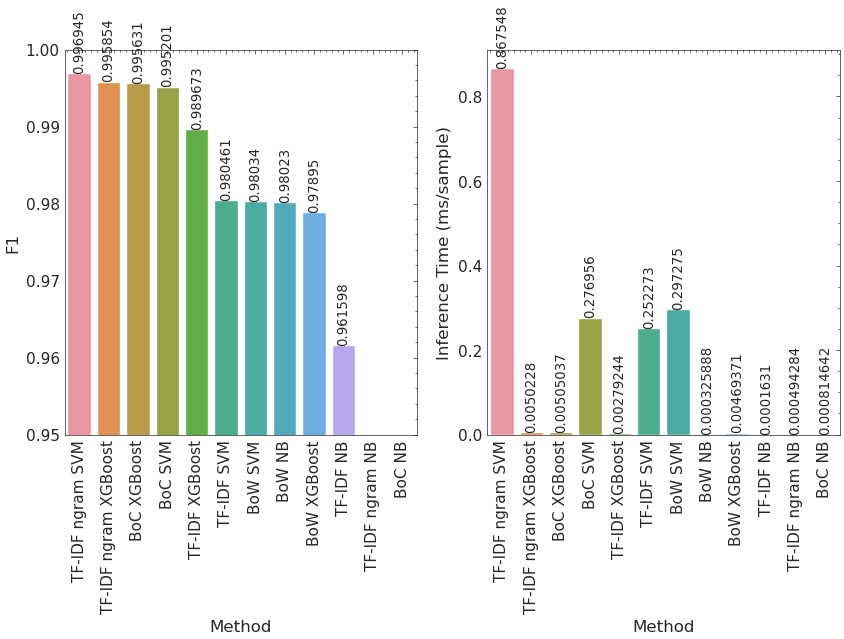

In [332]:
# Figure of Table Single NLP
current_figure_name = 'single_nlp_f1_vs_time.png'
plt.style.use(['science','no-latex','ieee'])
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 2, figsize=(10,5))

methods = ['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)

metric = 'F1'
df_sorted = df_small.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[0])
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90, fontsize='large')

metric = 'Inference Time (ms)'
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[1])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Inference Time (ms/sample)')
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90,fontsize='large')

ax.get_figure().savefig(figure_folder / current_figure_name)


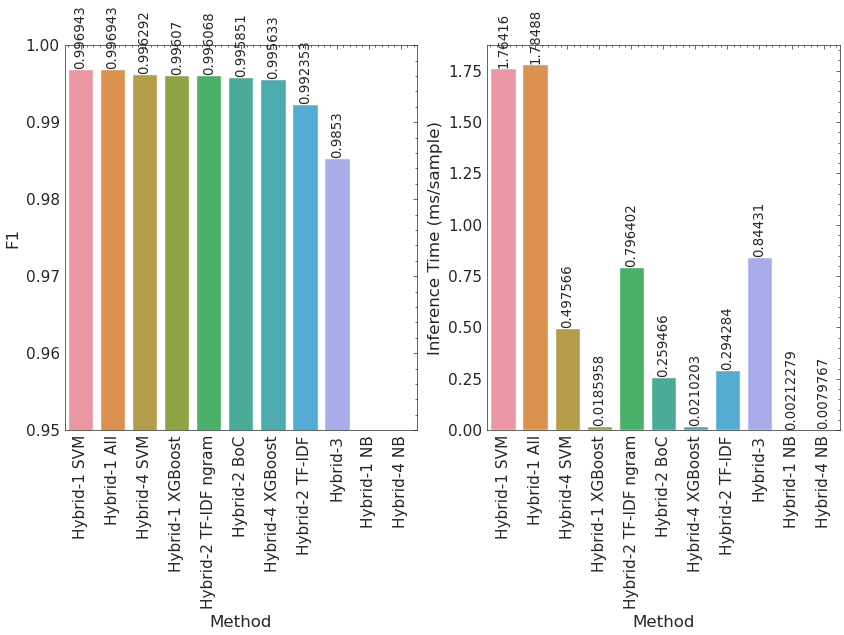

In [475]:
# Figure of Table Hybrid NLP
current_figure_name = 'hybrid_nlp_f1_vs_time.png'
plt.style.use(['science','no-latex','ieee'])
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 2, figsize=(10,5))

methods = ['hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)

metric = 'F1'
df_sorted = df_small.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[0])
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90, fontsize='large')

metric = 'Inference Time (ms)'
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[1])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Inference Time (ms/sample)')
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90,fontsize='large')

ax.get_figure().savefig(figure_folder / current_figure_name)

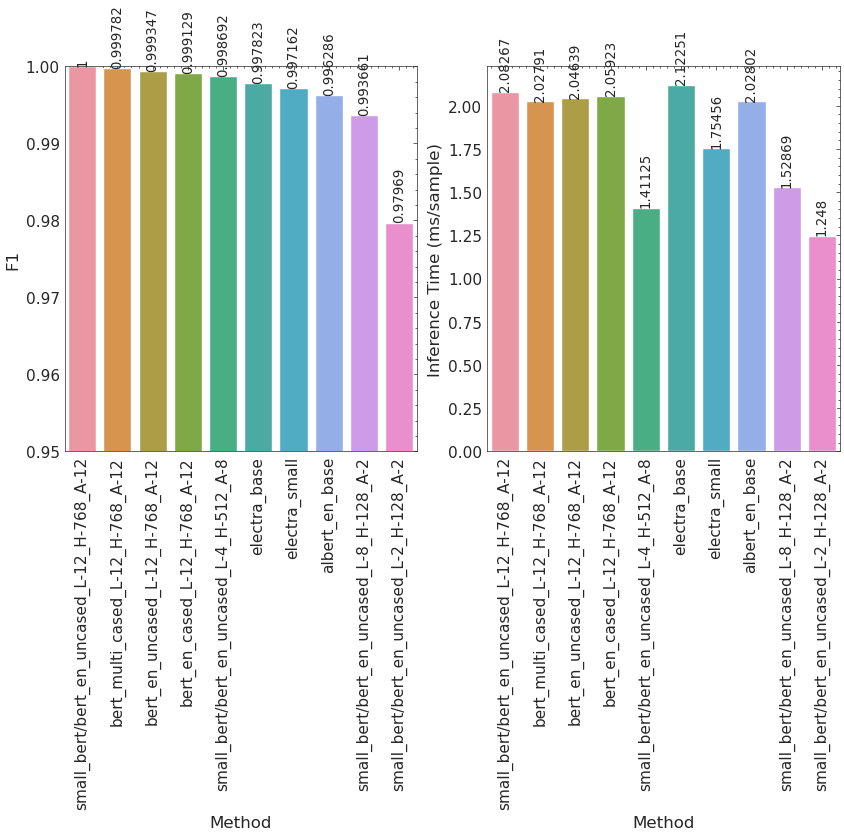

In [478]:
# Figure of Table Transformer NLP
current_figure_name = 'transformer_nlp_f1_vs_time.png'
plt.style.use(['science','no-latex','ieee'])
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 2, figsize=(10,5))

methods = ['bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']
metrics = ['overall_accuracy', 'precision', 'recall', 'f1', 'training time',
       'testing time']

df_small = df.loc[methods, metrics]

df_small = rename_table_labels(df_small)

metric = 'F1'
df_sorted = df_small.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[0])
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90, fontsize='large')

metric = 'Inference Time (ms)'
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[1])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Inference Time (ms/sample)')
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90,fontsize='large')

ax.get_figure().savefig(figure_folder / current_figure_name)

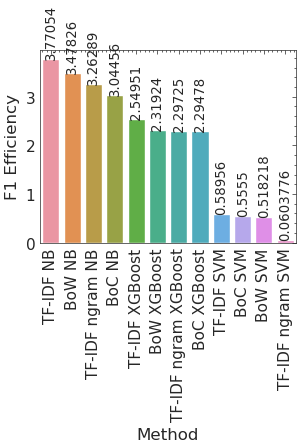

In [334]:
%%script echo skipping
# Figure of Table Single NLP - F1 Efficiency metric is 
#fig, axes = plt.subplots(1, 1, figsize=(10,5))
current_figure_name = 'single_nlp_f1_efficiency.png'
plt.style.use(['science','no-latex','ieee'])
plt.rcParams.update({'figure.dpi': '100'})
metrics = ['log(f1/s)']
df_small = df.loc[methods, metrics]
df_small = rename_table_labels(df_small)



metric = 'F1 Efficiency'
df_sorted = df_small.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="Method", y=metric)
ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90,fontsize='large')

ax.get_figure().savefig(figure_folder / current_figure_name)

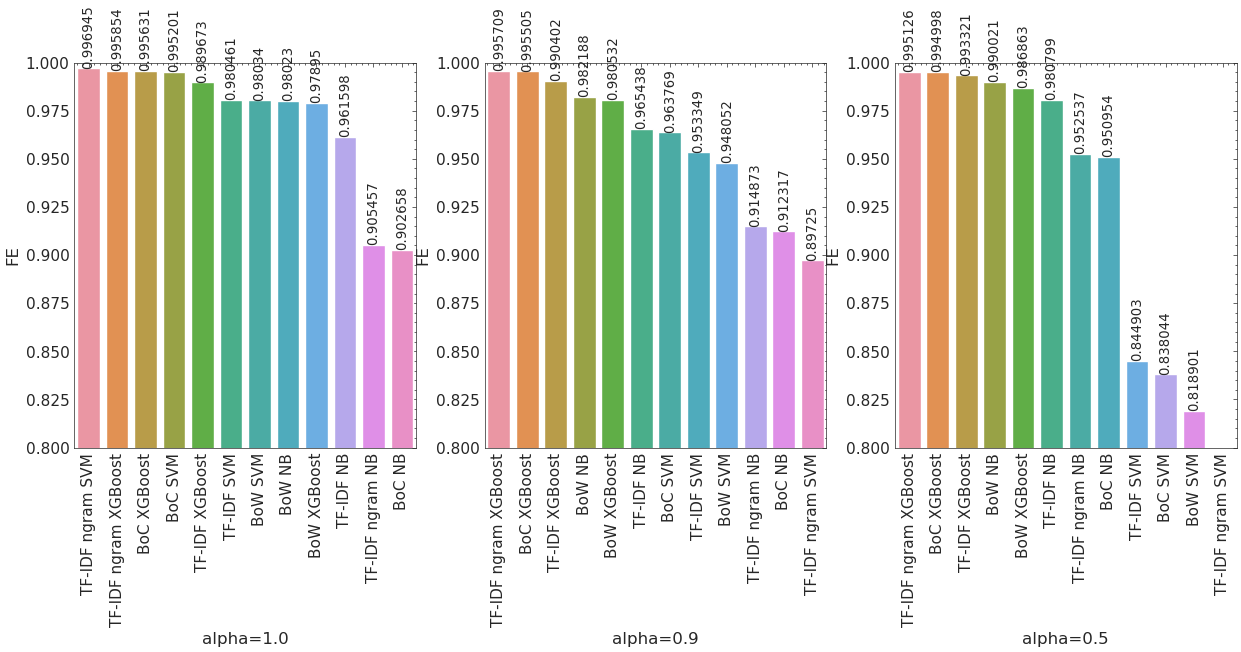

In [472]:
from sklearn import preprocessing
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 3, figsize=(15,5))
current_figure_name = 'single_nlp_FE_alphas.png'
plt.style.use(['science','no-latex','ieee'])

methods = ['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm']


metrics = ['f1','testing time']
df_small = df.loc[methods, metrics]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

for i, alpha in enumerate([1.0, 0.9, 0.5]):
    #alpha=1.00 #emphasis on F1 rather than speed
    df_small['FE'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
    #print(df_small)

    plt.style.use(['science','no-latex','ieee'])
    plt.rcParams.update({'figure.dpi': '100'})
    df_small_renamed = rename_table_labels(df_small)

    metric = 'FE'
    df_sorted = df_small_renamed.sort_values(metric,ascending=False).reset_index()
    ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[i])
    ax.tick_params(axis='x', rotation=90)
    #ax.title.set_text(f'alpha={alpha}')
    ax.set_xlabel(f'alpha={alpha}')
    ax.set(ylim=(0.8, 1))
    for i in ax.containers:
        ax.bar_label(i,rotation=90,fontsize='large')



ax.get_figure().savefig(figure_folder / current_figure_name)

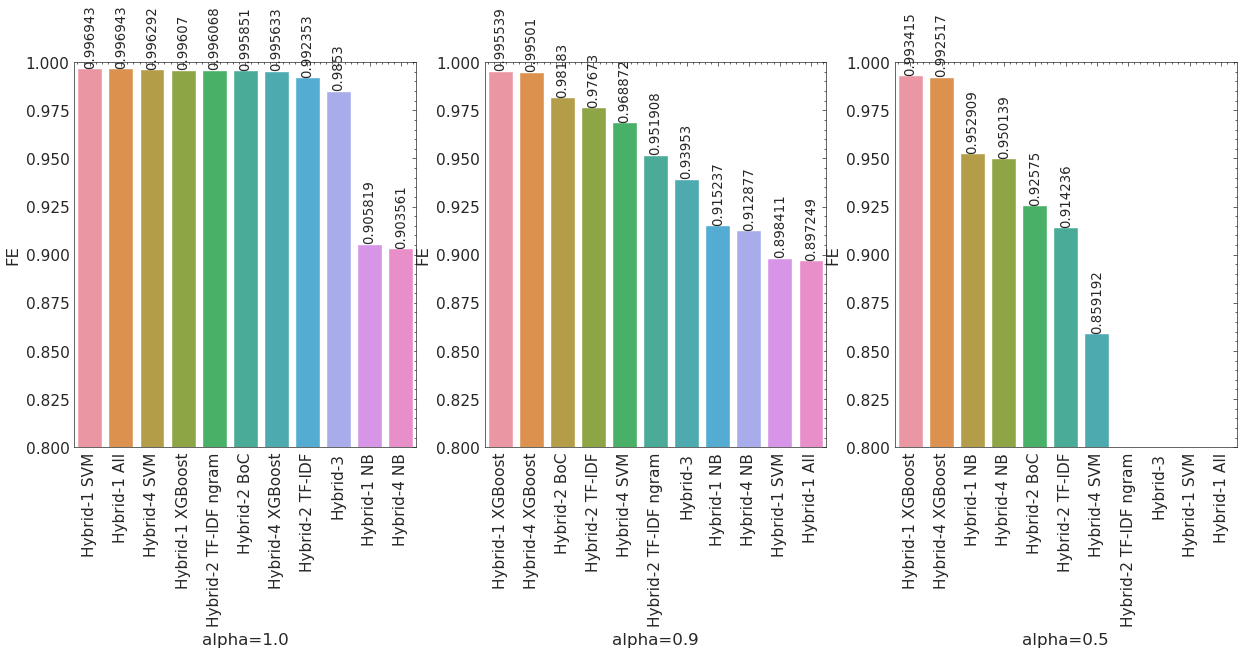

In [476]:
#Hybrid FE comparison different alpha
from sklearn import preprocessing
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 3, figsize=(15,5))
current_figure_name = 'hybrid_nlp_FE_alphas.png'
plt.style.use(['science','no-latex','ieee'])

methods = ['hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm']


metrics = ['f1','testing time']
df_small = df.loc[methods, metrics]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

for i, alpha in enumerate([1.0, 0.9, 0.5]):
    #alpha=1.00 #emphasis on F1 rather than speed
    df_small['FE'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
    #print(df_small)

    plt.style.use(['science','no-latex','ieee'])
    plt.rcParams.update({'figure.dpi': '100'})
    df_small_renamed = rename_table_labels(df_small)

    metric = 'FE'
    df_sorted = df_small_renamed.sort_values(metric,ascending=False).reset_index()
    ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[i])
    ax.tick_params(axis='x', rotation=90)
    #ax.title.set_text(f'alpha={alpha}')
    ax.set_xlabel(f'alpha={alpha}')
    ax.set(ylim=(0.8, 1))
    for i in ax.containers:
        ax.bar_label(i,rotation=90,fontsize='large')



ax.get_figure().savefig(figure_folder / current_figure_name)

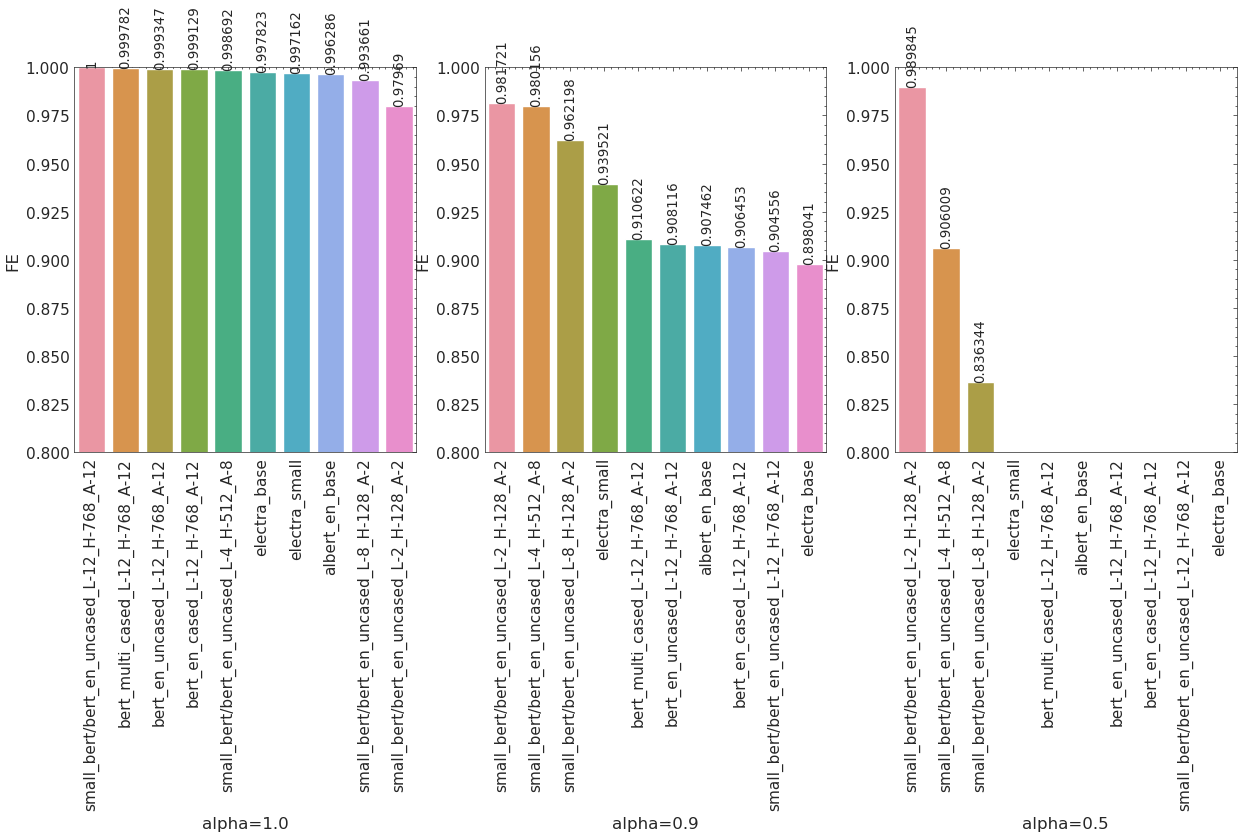

In [479]:
#Hybrid FE comparison different alpha
from sklearn import preprocessing
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(1, 3, figsize=(15,5))
current_figure_name = 'transformer_nlp_FE_alphas.png'
plt.style.use(['science','no-latex','ieee'])

methods = ['bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']

metrics = ['f1','testing time']
df_small = df.loc[methods, metrics]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

for i, alpha in enumerate([1.0, 0.9, 0.5]):
    #alpha=1.00 #emphasis on F1 rather than speed
    df_small['FE'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
    #print(df_small)

    plt.style.use(['science','no-latex','ieee'])
    plt.rcParams.update({'figure.dpi': '100'})
    df_small_renamed = rename_table_labels(df_small)

    metric = 'FE'
    df_sorted = df_small_renamed.sort_values(metric,ascending=False).reset_index()
    ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[i])
    ax.tick_params(axis='x', rotation=90)
    #ax.title.set_text(f'alpha={alpha}')
    ax.set_xlabel(f'alpha={alpha}')
    ax.set(ylim=(0.8, 1))
    for i in ax.containers:
        ax.bar_label(i,rotation=90,fontsize='large')



ax.get_figure().savefig(figure_folder / current_figure_name)

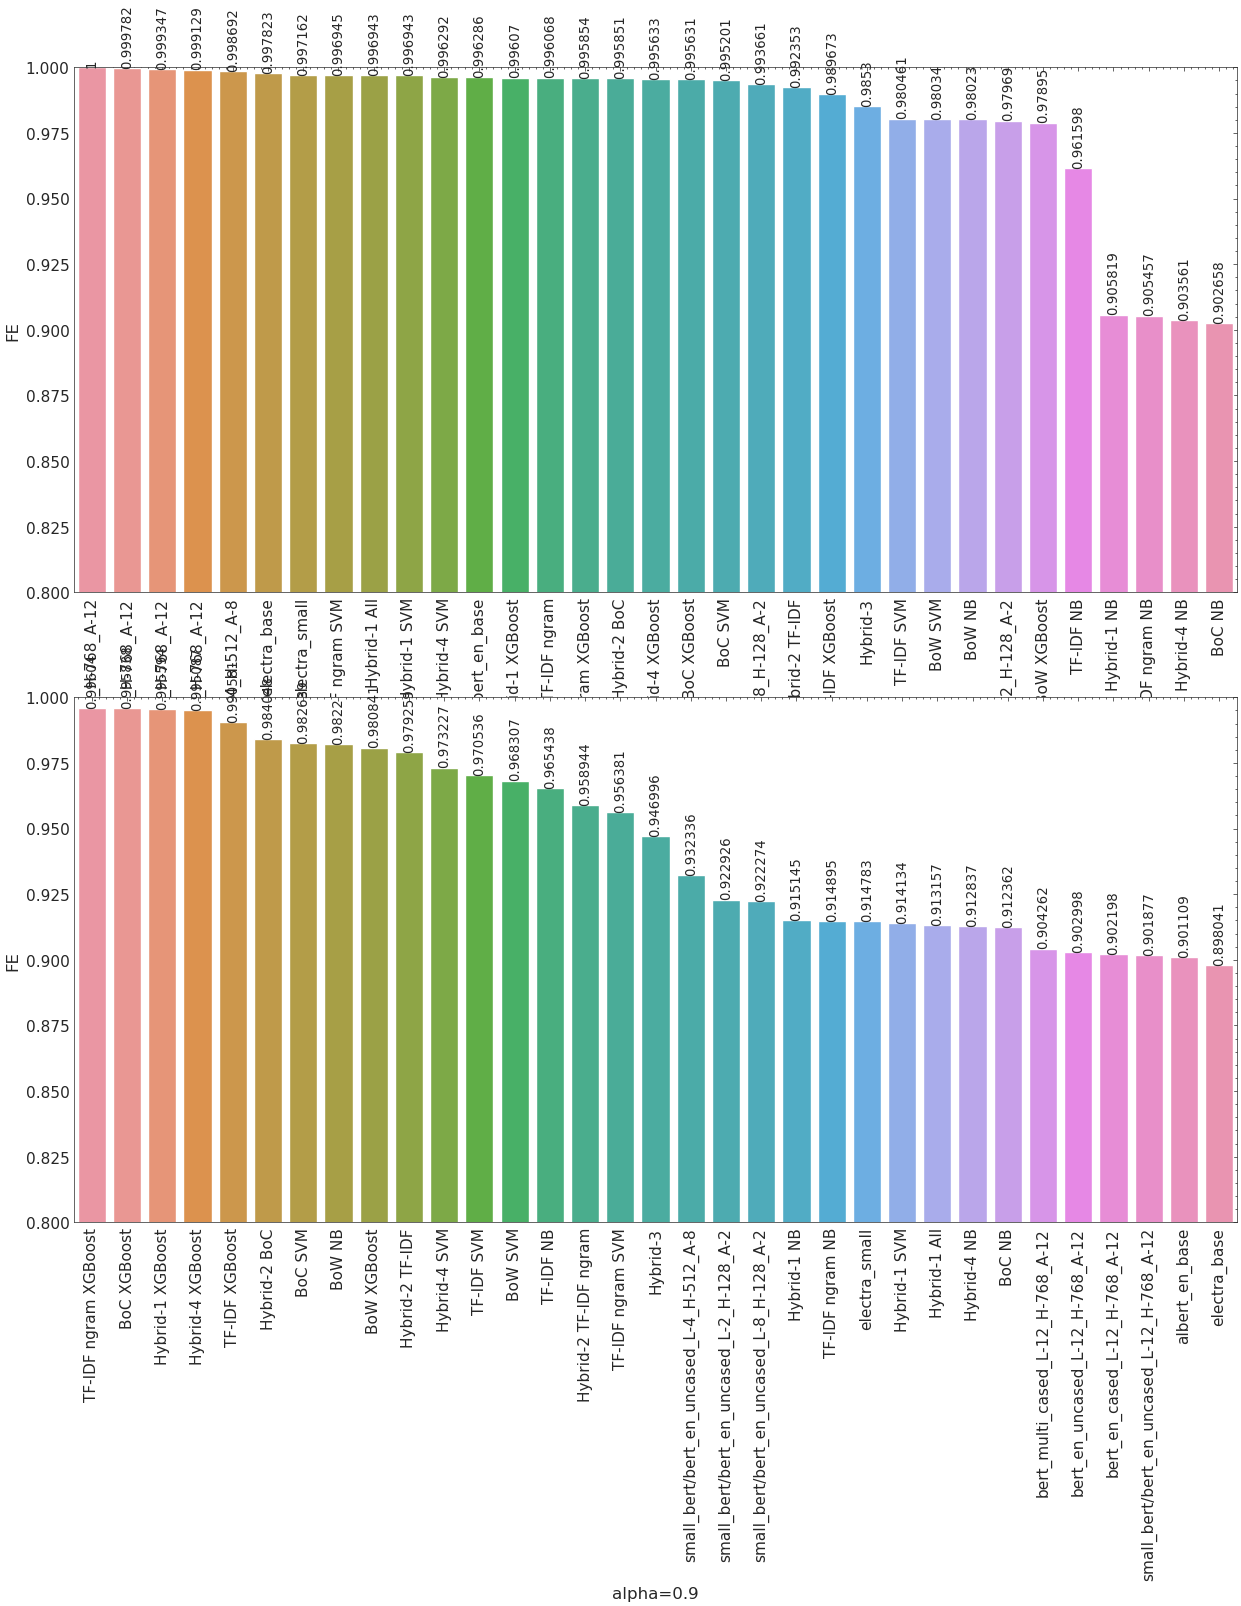

In [482]:
#ALL FE comparison different alpha
from sklearn import preprocessing
plt.rcParams.update({'figure.dpi': '100'})
fig, axes = plt.subplots(2, 1, figsize=(15,15))
current_figure_name = 'all_nlp_FE_alphas.png'
plt.style.use(['science','no-latex','ieee'])

methods = ['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm', 'hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm', 'bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small']

metrics = ['f1','testing time']
df_small = df.loc[methods, metrics]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled

for i, alpha in enumerate([1.0, 0.9]):
    #alpha=1.00 #emphasis on F1 rather than speed
    df_small['FE'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
    #print(df_small)

    plt.style.use(['science','no-latex','ieee'])
    plt.rcParams.update({'figure.dpi': '100'})
    df_small_renamed = rename_table_labels(df_small)

    metric = 'FE'
    df_sorted = df_small_renamed.sort_values(metric,ascending=False).reset_index()
    ax = sns.barplot(data=df_sorted,x="Method", y=metric, ax=axes[i])
    ax.tick_params(axis='x', rotation=90)
    #ax.title.set_text(f'alpha={alpha}')
    ax.set_xlabel(f'alpha={alpha}')
    ax.set(ylim=(0.8, 1))
    for i in ax.containers:
        ax.bar_label(i,rotation=90,fontsize='large')



ax.get_figure().savefig(figure_folder / current_figure_name)

In [396]:
metrics = ['f1','testing time']
df_small = df.loc[methods, metrics]
df_small = df_small.sort_values('f1',ascending=False)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(1.0000 - df_small['testing time'].to_numpy().reshape(-1, 1))
df_small['inference scaled'] = x_scaled
alpha=1.00 #emphasis on F1 rather than speed
df_small['EF'] = alpha*df_small['f1'] + (1-alpha)*df_small['inference scaled']
#print(df_small)
########
f1 = df_small['f1'].to_numpy().reshape(-1,1)
it = df_small['inference scaled'].to_numpy().reshape(-1,1)
alpha = np.linspace(1, 0, 11).reshape(1,-1)
data = alpha*f1 + (1-alpha)*(it)
df_3d = pd.DataFrame(data)
df_3d.set_index(df_small.index,inplace=True)
df_3d.set_axis(alpha[0,:], axis=1, inplace=True)
df_3d.rename_axis("alpha", axis="columns",inplace=True)
df_3d.rename_axis("Method", axis="index",inplace=True)
#print(len(df_small.index))
print(df_3d.to_numpy())

[[0.99694457 0.89725011 0.79755565 0.6978612  0.59816674 0.49847228
  0.39877783 0.29908337 0.19938891 0.09969446 0.        ]
 [0.99585424 0.99570855 0.99556285 0.99541716 0.99527147 0.99512577
  0.99498008 0.99483438 0.99468869 0.99454299 0.9943973 ]
 [0.99563128 0.9955047  0.99537813 0.99525155 0.99512497 0.9949984
  0.99487182 0.99474524 0.99461866 0.99449209 0.99436551]
 [0.9952007  0.9637694  0.93233811 0.90090681 0.86947552 0.83804422
  0.80661293 0.77518163 0.74375033 0.71231904 0.68088774]
 [0.9896726  0.99040221 0.99113181 0.99186142 0.99259102 0.99332063
  0.99405023 0.99477984 0.99550944 0.99623905 0.99696866]
 [0.98046103 0.95334941 0.92623779 0.89912616 0.87201454 0.84490292
  0.81779129 0.79067967 0.76356805 0.73645643 0.7093448 ]
 [0.98034018 0.9480524  0.91576463 0.88347685 0.85118907 0.81890129
  0.78661352 0.75432574 0.72203796 0.68975018 0.65746241]
 [0.98023028 0.98218849 0.98414669 0.9861049  0.9880631  0.9900213
  0.99197951 0.99393771 0.99589592 0.99785412 0.9998

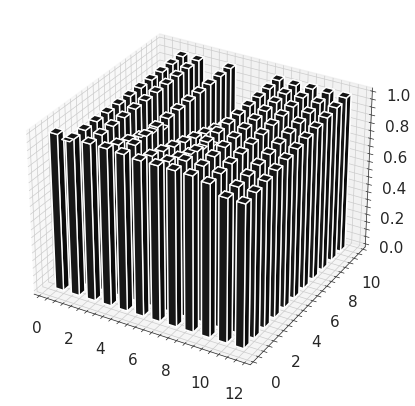

In [437]:
x=np.array([])
y=np.array([])
top=np.array([])
for xi in range(len(df_3d.index)):
    for yi in range(len(df_3d.columns)):
        #print(xi,yi,df_3d.iloc[xi,yi])
        x = np.append(x, xi)
        y= np.append(y, yi)
        top = np.append(top,df_3d.iloc[xi,yi])


bottom = np.zeros_like(top)
width = depth = 0.5

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')


ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
#ax1.plot_wireframe(x, y, top)
#ax1.stem(x, y, top)
plt.show()


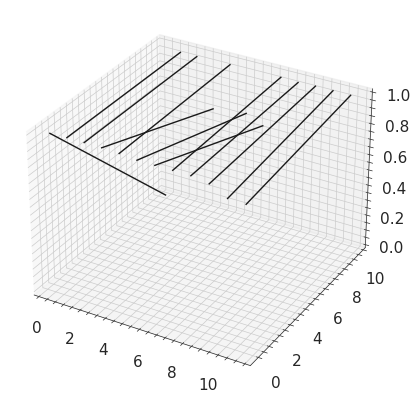

In [455]:
x = np.arange(len(df_3d.index))
y = np.arange(len(df_3d.columns))
X, Y = np.meshgrid(x, y)

Z = df_3d.to_numpy().transpose()
Z.shape
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot_wireframe(X, Y, Z, rstride=0)

plt.show()

In [180]:
print(df.index)
print(df.columns)

Index(['bow_nb', 'bow_xgboost', 'bow_svm', 'boc_nb', 'boc_xgboost', 'boc_svm',
       'tfidf_nb', 'tfidf_xgboost', 'tfidf_svm', 'tfidfng_nb',
       'tfidfng_xgboost', 'tfidfng_svm', 'hybrid1_nb', 'hybrid1_xgboost',
       'hybrid1_svm', 'hybrid1_all_ml_averaged', 'hybrid2_boc',
       'hybrid2_tfidf', 'hybrid2_tfidf_ng', 'hybrid3', 'hybrid4_nb',
       'hybrid4_xgboost', 'hybrid4_svm', 'bert_en_uncased_L-12_H-768_A-12',
       'bert_en_cased_L-12_H-768_A-12',
       'small_bert/bert_en_uncased_L-2_H-128_A-2',
       'small_bert/bert_en_uncased_L-4_H-512_A-8',
       'small_bert/bert_en_uncased_L-8_H-128_A-2',
       'small_bert/bert_en_uncased_L-12_H-768_A-12',
       'bert_multi_cased_L-12_H-768_A-12', 'albert_en_base', 'electra_base',
       'electra_small'],
      dtype='object')
Index(['overall_accuracy', 'precision', 'recall', 'f1', 'tn', 'fp', 'fn', 'tp',
       'train size', 'test size', 'train data', 'test data', 'training time',
       'testing time'],
      dtype='object')


In [13]:
df_small = df.copy()
df_small = df_small.sort_values('overall_accuracy',ascending=False)
df_renamed = rename_table_labels(df)

table_name = "all_results_table"
out_file_name = (table_folder / table_name).with_suffix('.csv') 
df_renamed.to_csv(out_file_name)

End